<a href="https://colab.research.google.com/github/brennoliveira/ML-Bolsa-Familia/blob/main/An%C3%A1lise_Bolsa_Fam%C3%ADlia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports necessários

In [303]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Lendo os datasets

In [304]:
df = pd.read_csv('datasets/data_familia_sergipe.csv')
dp = pd.read_csv('datasets/data_pessoas_sergipe.csv')

### Algumas alterações na base Famílias

In [305]:
df.columns
# Convertendo os atributos para categórico
df[['estrato','classf','cod_local_domic_fam','cod_especie_domic_fam','cod_material_piso_fam','cod_agua_canalizada_fam','cod_material_domic_fam','cod_abaste_agua_domic_fam','cod_familia_indigena_fam','ind_familia_quilombola_fam']] = df[['estrato','classf','cod_local_domic_fam','cod_especie_domic_fam','cod_agua_canalizada_fam','cod_material_piso_fam','cod_material_domic_fam','cod_abaste_agua_domic_fam','cod_familia_indigena_fam','ind_familia_quilombola_fam']].astype("category")
df.dtypes

# REMOVE COLUNAS QUE NÃO TERÃO INFLUÊNCIA NA ANÁLISE
df.drop(['id_familia','cod_escoa_sanitario_domic_fam','cod_destino_lixo_domic_fam','cod_iluminacao_domic_fam','ind_parc_mds_fam','cod_calcamento_domic_fam','cod_banheiro_domic_fam', 'cd_ibge','cod_eas_fam','dat_cadastramento_fam', 'dat_alteracao_fam', 'dat_atualizacao_familia','nom_centro_assist_fam', 'nom_estab_assist_saude_fam', 'cod_centro_assist_fam'],  axis='columns', inplace=True)
df.columns


Index(['estrato', 'classf', 'vlr_renda_media_fam', 'cod_local_domic_fam',
       'cod_especie_domic_fam', 'qtd_comodos_domic_fam',
       'qtd_comodos_dormitorio_fam', 'cod_material_piso_fam',
       'cod_material_domic_fam', 'cod_agua_canalizada_fam',
       'cod_abaste_agua_domic_fam', 'cod_familia_indigena_fam',
       'ind_familia_quilombola_fam', 'marc_pbf', 'qtde_pessoas', 'peso.fam'],
      dtype='object')

C:\Python310\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Python310\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Python310\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Python310\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped_vals = vals.groupby(grouper)
C:\Python310\lib\site-packages\seaborn\categorical.py:253: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return 

<AxesSubplot:xlabel='cod_material_domic_fam', ylabel='count'>

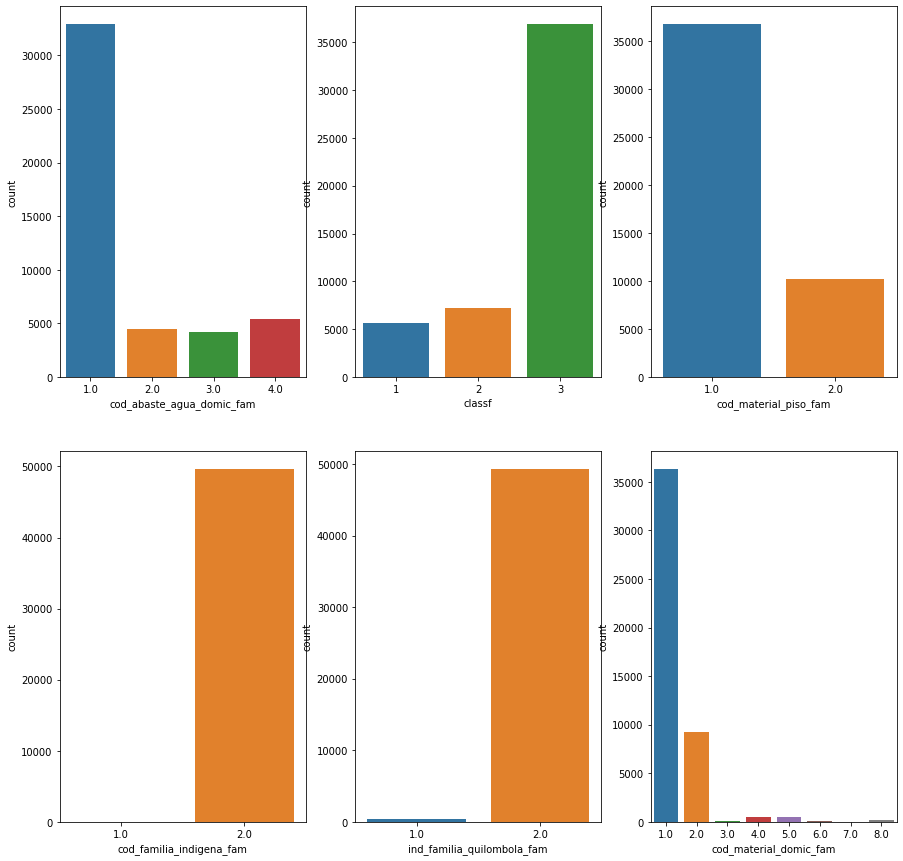

In [328]:
fig, axs = plt.subplots(ncols=3,nrows=2,figsize=(15,15))
sns.countplot(x="cod_abaste_agua_domic_fam",data=df.query('marc_pbf == 1'),ax=axs[0][0])
sns.countplot(x="classf",data=df.query('marc_pbf == 1'),ax=axs[0][1])
sns.countplot(x="cod_material_piso_fam",data=df.query('marc_pbf == 1'),ax=axs[0][2])
sns.countplot(x="cod_familia_indigena_fam",data=df.query('marc_pbf == 1'),ax=axs[1][0])
sns.countplot(x="ind_familia_quilombola_fam",data=df.query('marc_pbf == 1'),ax=axs[1][1])
sns.countplot(x="cod_material_domic_fam",data=df.query('marc_pbf == 1'),ax=axs[1][2])

### Análise 
*análise feita considerando apenas as famílias que recebem o benefício*

* Gráfico 1:
  - A maioria das famílias beneficiárias recebem sua água pela `Rede Geral`.
* Gráfico 2:
  - A maioria das famílias beneficiárias estão concentradas fora das capitais e regiões metropolitanas.
* Gráfico 3:
  - A maioria dos domicílios das famílias beneficiárias possuem piso de `CIMENTO` ou `CERÂMICA`.
* Gráfico 4:
  - Nenhuma das famílias beneficiárias são indígenas.
* Gráfico 5:
  - Pouquíssimas famílias beneficiárias são quilombolas.
* Gráfico 6:
  - A maioria dos domicílios das famílias beneficiárias são feitos de `ALVENARIA/TIJOLO C/ REVESTIMENTO`.

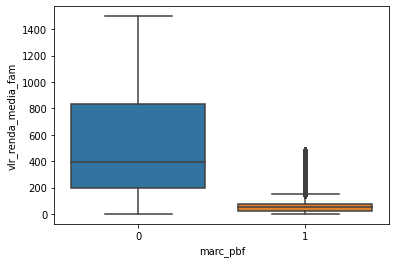

In [307]:
ax = sns.boxplot(x="marc_pbf", y="vlr_renda_media_fam", data=df.query('vlr_renda_media_fam < 1500'))
# ax = sns.boxplot(x = 'vlr_renda_media_fam', y = 'marc_pbf', data = df.query('vlr_renda_media_fam < 1580'), orient = 'h')
# ax.figure.set_size_inches(12,4)
# ax.set_title('Renda média', fontsize=18)

### Análise 
- Quanto menor a renda média familiar, maiores são as chances de receber o benefício.

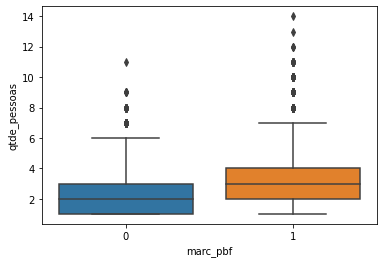

In [308]:
ax = sns.boxplot(x="marc_pbf", y="qtde_pessoas", data=df)

### Análise 
- Podemos perceber que a quantidade de pessoas na família também pode influenciar o recebimento do benefício, mas não tanto quanto a renda.

In [309]:
df.describe()

,vlr_renda_media_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,marc_pbf,qtde_pessoas,peso.fam
count,82275.000000,78105.000000,78119.000000,82275.00000,82275.000000,8.227500e+04
mean,218.447414,4.866423,1.965079,0.61461,2.511188,5.502509e+14
std,304.996336,1.113348,0.669059,0.48669,1.409489,7.763423e+10
min,0.000000,0.000000,0.000000,0.00000,1.000000,5.500504e+14
25%,36.000000,4.000000,2.000000,0.00000,1.000000,5.502184e+14
50%,75.000000,5.000000,2.000000,1.00000,2.000000,5.502451e+14
75%,282.000000,5.000000,2.000000,1.00000,3.000000,5.502791e+14
max,2811.000000,20.000000,20.000000,1.00000,14.000000,5.504321e+14


<AxesSubplot:>

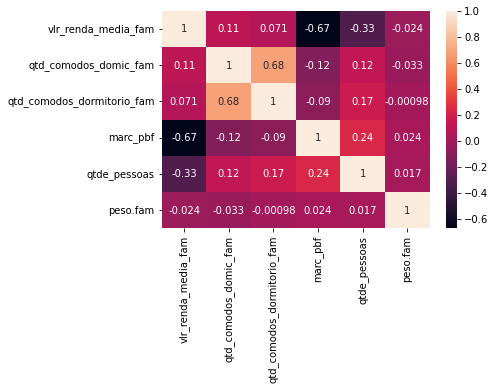

In [310]:
corr_table = df.corr()
sns.heatmap(corr_table, xticklabels=corr_table.columns, yticklabels=corr_table.columns, annot=True)

### Análise 
- E para comprvoar, podemos ver que a correlação entre a renda (`vlr_renda_media_fam`) e o recebimento do benefício (`marc_pbf`) é bastante forte, negativamente, em relação as outras.

In [311]:
# PORCENTAGEM DE PESSOAS QUE RECEBEM BOLSA FAMILIA
df_recebem = df.query('marc_pbf == 1')
df_recebem

df.marc_pbf.value_counts(normalize=True)*100

1    61.460954
0    38.539046
Name: marc_pbf, dtype: float64

In [312]:
# QUEM RECEBE BF COMPARADO COM A RENDA MEDIA
frequencia = pd.crosstab(df.marc_pbf, df.vlr_renda_media_fam)
frequencia

vlr_renda_media_fam,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,2515.0,2542.0,2600.0,2638.0,2700.0,2701.0,2739.0,2791.0,2800.0,2811.0
marc_pbf,,,,,,,,,,,,,,,,,,,,,
0,338,1,12,7,22,27,35,18,47,2,...,1,1,1,1,2,1,1,1,2,2
1,2757,102,293,237,456,465,567,191,840,119,...,0,0,0,0,0,0,0,0,0,0


In [313]:
# MÉDIA DA RENDA MÉDIA ENTRE AS PESSOAS QUE RECEBEM E N RECEBEM BOLSA FAMILIA
df.groupby(['marc_pbf'])['vlr_renda_media_fam'].mean()



marc_pbf
0    478.413082
1     55.436134
Name: vlr_renda_media_fam, dtype: float64

In [314]:
df_recebem.mode()

# MAIS FAMILIAS DA REGIÁO OUTRAS RECEBEM 
# MAIS FAMILIAS DA ZONA URBANA
# MAIS FAMILIAS COM 2 PESSOAS

,estrato,classf,vlr_renda_media_fam,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,cod_material_piso_fam,cod_material_domic_fam,cod_agua_canalizada_fam,cod_abaste_agua_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,marc_pbf,qtde_pessoas,peso.fam
0,2,3,50.0,1.0,1.0,5.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1,2,550245146328323


<AxesSubplot:>

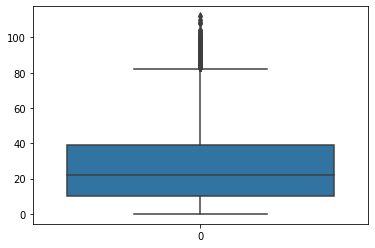

In [315]:
# idade
sns.boxplot(data=dp['idade'])


### Análise 
- Gráfico para mostrar o range de idade.

<AxesSubplot:>

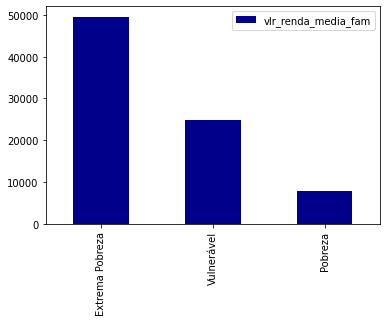

In [316]:
# transformação da renda média
df['vlr_renda_media_fam'] = pd.cut(df['vlr_renda_media_fam'], bins=[0, 100.0, 200.0, float('inf')], right=False, labels=['Extrema Pobreza', 'Pobreza', 'Vulnerável'])

renda = df['vlr_renda_media_fam'].value_counts().to_frame()
renda.plot(kind='bar', color='darkBlue')

### Análise 
- Podemos perceber que a maioria das pessoas cadastradas se encontram na faixa de renda de `Extrema Pobreza`, ou seja, possuem uma renda média de no máximo `R$100`.
- Legenda de grupos:
  - Extrema Pobreza - [`R$0 - R$100`]
  - Pobreza - [`R$100.1 - R$200`]
  - Vulnerável - [`R$200,1 - `]

In [317]:
vulneravel = df[df['vlr_renda_media_fam'] == 'Vulnerável'].index
df.drop(vulneravel, inplace=True)

- Removendo as pessoas em situação `Vulnerável`.

<AxesSubplot:>

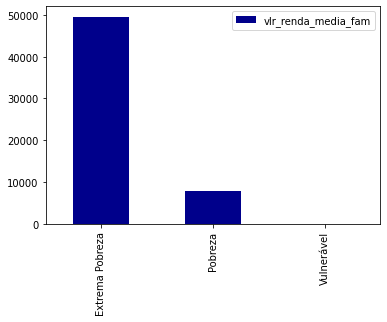

In [318]:
renda = df['vlr_renda_media_fam'].value_counts().to_frame()
renda.plot(kind='bar', color='darkBlue')

- Agora temos uma noção melhor da situação da renda das pessoas cadastradas.

### Análise da base Pessoas

#### Algumas alterações na base

In [319]:
dp.columns
# Convertendo os atributos para categórico
dp[['cod_sexo_pessoa', 'idade','cod_raca_cor_pessoa', 'cod_local_nascimento_pessoa',
'cod_deficiencia_memb','cod_curso_frequenta_memb','cod_curso_frequentou_pessoa_memb',
'cod_concluiu_frequentou_memb','cod_principal_trab_memb','val_remuner_emprego_memb'
]] = dp[['cod_sexo_pessoa', 'idade','cod_raca_cor_pessoa', 'cod_local_nascimento_pessoa',
'cod_deficiencia_memb','cod_curso_frequenta_memb','cod_curso_frequentou_pessoa_memb',
'cod_concluiu_frequentou_memb','cod_principal_trab_memb','val_remuner_emprego_memb']].astype("category")
dp.dtypes

# # REMOVE COLUNAS QUE NÃO TERÃO INFLUÊNCIA NA ANÁLISE
dp.drop(['cd_ibge','estrato', 'classf', 'id_familia', 'id_pessoa',
'cod_parentesco_rf_pessoa','cod_certidao_registrada_pessoa','cod_sabe_ler_escrever_memb', 
'ind_frequenta_escola_memb','cod_escola_local_memb','cod_ano_serie_frequenta_memb',
'cod_ano_serie_frequentou_memb','cod_trabalhou_memb', 'cod_afastado_trab_memb',
'cod_agricultura_trab_memb','cod_trabalho_12_meses_memb',
'qtd_meses_12_meses_memb', 'val_renda_bruta_12_meses_memb',
'val_renda_doacao_memb', 'val_renda_aposent_memb',
'val_renda_seguro_desemp_memb', 'val_renda_pensao_alimen_memb',
'val_outras_rendas_memb', 'peso.fam', 'peso.pes'],  axis='columns', inplace=True)
dp.columns

Index(['cod_sexo_pessoa', 'idade', 'cod_raca_cor_pessoa',
       'cod_local_nascimento_pessoa', 'cod_deficiencia_memb',
       'cod_curso_frequenta_memb', 'cod_curso_frequentou_pessoa_memb',
       'cod_concluiu_frequentou_memb', 'cod_principal_trab_memb',
       'val_remuner_emprego_memb'],
      dtype='object')

#### Transformação de alguns dados

In [320]:
# raça/cor das pessoas cadastradas
dp['cod_raca_cor_pessoa'] = pd.cut(dp['cod_raca_cor_pessoa'],bins=[1.0,2.0,3.0,4.0,5.0,float('inf')],right=False,labels=['Branca','Preta','Amarela','Parda','Indígena'])

# diferença da quantidade de HOMENS e MULHERES
dp['cod_sexo_pessoa'] = pd.cut(dp['cod_sexo_pessoa'],bins=[1.0,2.0,float('inf')],right=False,labels=['Masculino','Feminino'])

# idade
dp['idade'] = pd.cut(dp['idade'], bins=[0, 13, 24, 60, float('inf')], right=False, labels=['Criança', 'Adolescente', 'Adulto', 'Idoso'])

# tipo de trabalho
dp['cod_principal_trab_memb'] = pd.cut(dp['cod_principal_trab_memb'], bins=[1,2,3,4,5,6,7,8,9,10,11, float('inf')], right=False, labels=['atuônomo', 'trab. temporário zona rural', 'empregado s/ carteira assinada', 'empregado c/ carteira assinada', 'trab. doméstico s/ carteira assinada', 'trab.doméstico c/ carteira assinada', 'trab. não-remunerado', 'militar ou servidor público', 'empregador', 'estagiário', 'aprendiz'])

# nível de educação
dp['cod_curso_frequentou_pessoa_memb'] = pd.cut(dp['cod_curso_frequentou_pessoa_memb'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14, float('inf')], right=False, labels=['creche', 'pré-escola (exceto CA)', 'classe de alfabetização', 'ensino fundamental (1 fase)', 'ensino fundamental (2 fase)', 'ensino fundamental (completo)', 'ensino fundamental especial', 'ensino médio', 'ensino médio especial', 'ensino fundamental (supletivo 1-4)', 'ensino fundamental (supletivo 5-8', 'ensino médio (supletivo)', 'ensino superior', 'alfabetização para adultos', 'nenhum'])


<AxesSubplot:>

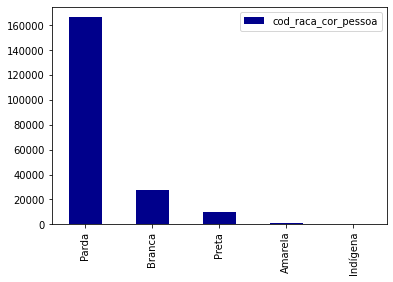

In [321]:
cor = dp['cod_raca_cor_pessoa'].value_counts().to_frame()
cor.plot(kind='bar',color='darkBlue')

### Análise 
- Podemos perceber que a maioria das pessoas cadastradas se identificam como `Pardos`.

<AxesSubplot:>

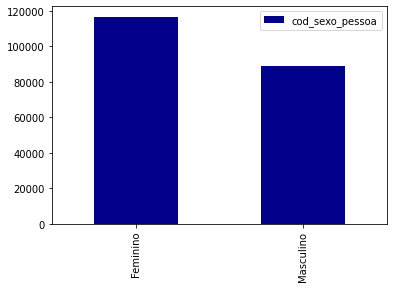

In [322]:

sexo = dp['cod_sexo_pessoa'].value_counts().to_frame()
sexo.plot(kind='bar',color='darkBlue')

### Análise 
- Podemos perceber que a maioria das pessoas cadastradas são do sexo `Feminino`.

<AxesSubplot:>

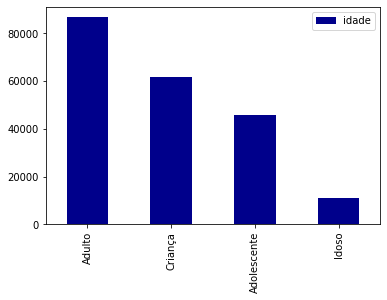

In [323]:

idade = dp['idade'].value_counts().to_frame()
idade.plot(kind='bar', color='darkblue')

### Análise 
- Podemos perceber que a maioria das pessoas cadastradas se encontram entre as faixas de idade de `Adultos` e `Crianças`. Sendo que, os `Idosos` são os que estão em menor escala.
- Legenda de grupos de idade:
  - Criança - [0 - 13]
  - Adolescente - [14 - 24]
  - Adulto - [25 - 60]
  - Idoso - [60 - ]

<AxesSubplot:>

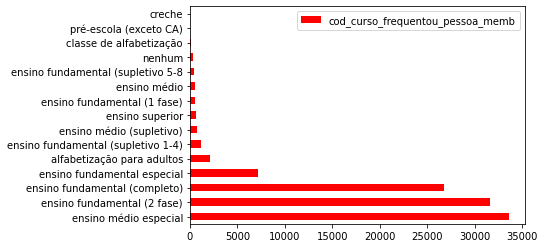

In [324]:

freq = dp['cod_curso_frequentou_pessoa_memb'].value_counts().to_frame()
freq.plot(kind='barh', color='red')

### Análise 
- Podemos perceber que a maioria das pessoas possuem um nível de educação entre `Ensino Médio Completo`, `Ensino Fundamental Completo`.


<AxesSubplot:>

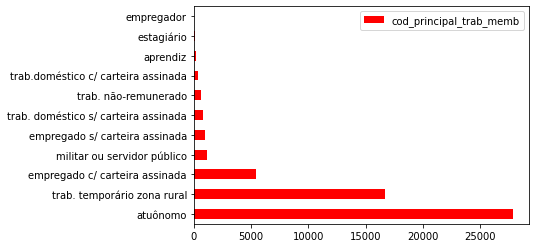

In [325]:

trab = dp['cod_principal_trab_memb'].value_counts().to_frame()
trab.plot(kind='barh', color='red')

### Análise 
- Podemos perceber que a maioria das pessoas cadastradas trabalham como `Autônomos` ou na `Zona Rural`.